In [63]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

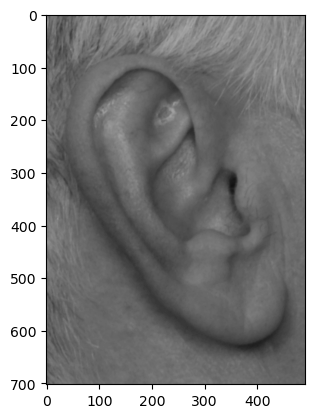

In [110]:
# Read in the image
orig = cv2.imread("train/106_zoom_ear.jpg")
# removing noise
orig = cv2.medianBlur(orig,3)
image = cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)
plt.imshow(image,cmap='gray', vmin=0, vmax=255)

In [111]:
pixel_vals = image.reshape((-1,3))
pixel_vals = np.float32(pixel_vals)


83


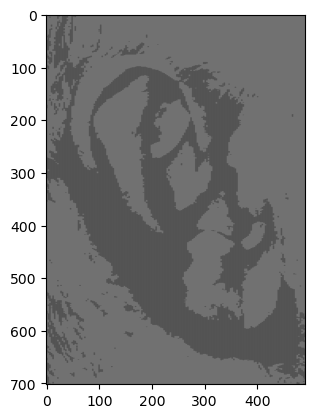

In [112]:

#the below line of code defines the criteria for the algorithm to stop running,
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy)
#becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
 
# then perform k-means clustering with number of clusters defined as 3
#also random centres are initially choosed for k-means clustering
k = 2
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
 
# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
 
# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
 
plt.imshow(segmented_image, cmap='gray', vmin=0, vmax=255)
print(centers.min())

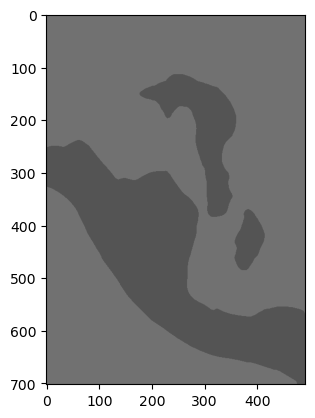

In [113]:
segmented_image = cv2.medianBlur(segmented_image,99)
plt.imshow(segmented_image, cmap='gray', vmin=0, vmax=255)

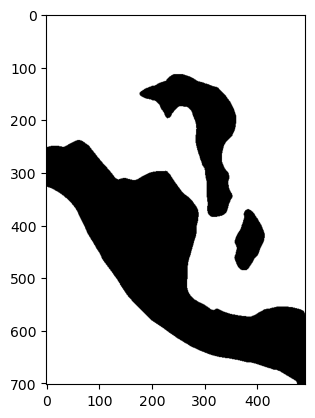

In [114]:
for i in range(segmented_image.shape[0]):
    for j in range(segmented_image.shape[1]):
        if(segmented_image[i][j]<=(centers.min()+5)):
            segmented_image[i][j]=0
        else:
            segmented_image[i][j]=255
plt.imshow(segmented_image, cmap='gray', vmin=0, vmax=255)

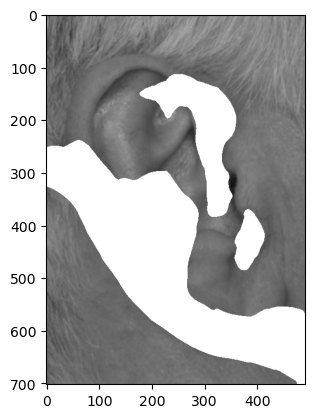

In [122]:
result = image.copy()
result = cv2.cvtColor(result, cv2.COLOR_BGR2BGRA)
result[:, :, 3] = segmented_image
# orig = cv2.cvtColor(orig,cv2.COLOR_BGR2RGB)
# result = np.dstack((orig, segmented_image))
plt.imshow(result)

In [118]:
plt.imsave("ss.png",result)